## Mini Project III

This project involved using unsupervised learning to classify bank customers into segments, first based on their demographics, then based on their banking behaviour.

The demographic-based and behaviour-based clusters are compared using radar plots.

Finally, Principal Component Analysis is used on both sets of clusters to select the two features that are most important for distinguishing each cluster and then visualized using scatter plots.

**Step 1: Data Wrangling**
- use pandas to import csv files and create dataframes

**Step 2: Exploratory Data Analysis**
- determine shape of data frames: 9 dataframes (1 with customer demographics, 4 describing accounts, 4 describing transactions)
- identify data types 
- examine descriptive statistics
- check for outliers
- check for missing values (acct_end_date, channel, name_prefix)
- univariate and multivariate visualizations

**Step 3: Data Preparation & Feature Engineering**
- fix / remove outliers as necessary (n/a in this case)
- null value replacement OR remove features / records with missing values:
    - removed name_prefix, channel
- feature creation:
    - created a 'region' feature that classified customers into four regions of the US
    - created a 'has_children' feature to classify customers according to whether or not they have children
    - created a 'is_senior' feature to classify customers according to whether or not they are a senior
    - created 4 age bins to group customers by broad age groups

**Step 4: Unsupervised Learning - K-means Clustering**
- plot elbow plot to determine optimal number of clusters (5)
- fit a Kmeans model to the data and classify customers into clusters
- visualize the clusters using a radar plot

**Step 5: Dimensionality Reduction**
- use Principal Component Analysis to determine the two features that explain the highest percentage of variance between clusters.
- use a scatter plot to visualize the segmentations


# Data Wrangling

In [ ]:
import pandas as pd
import seaborn as sns
import datetime as dt

In [110]:
df_list = []
table_name_list = [
    'twm_accounts', 'twm_checking_acct', 'twm_checking_tran', 'twm_credit_acct',
    'twm_credit_tran', 'twm_customer', 'twm_savings_acct', 'twm_savings_tran', 'twm_transactions'
    ]

for i in table_name_list:
    df = pd.read_csv(i+'.csv', sep=';')
    df_list.append(df)

In [111]:
accounts_df = df_list[0]
checking_acct_df = df_list[1]
checking_tran_df = df_list[2]
credit_acct_df = df_list[3]
credit_tran_df = df_list[4]
customer_df = df_list[5]
savings_acct_df = df_list[6]
savings_tran_df = df_list[7]
transactions_df = df_list[8]


# Data Preparation & Feature Engineering

### Customer Table

##### Step 1 - EDA

In [112]:
customer_df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [113]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [114]:
customer_df.shape

(747, 15)

In [115]:
customer_df.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [116]:
# check for dupes for Id
idsUnique = len(set(customer_df.cust_id))
idsTotal = customer_df.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [117]:
customer_df['city_name'].nunique()

69

In [118]:
customer_df['state_code'].nunique()

33

C:\Users\User\AppData\Local\Temp\ipykernel_22556\1682001555.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

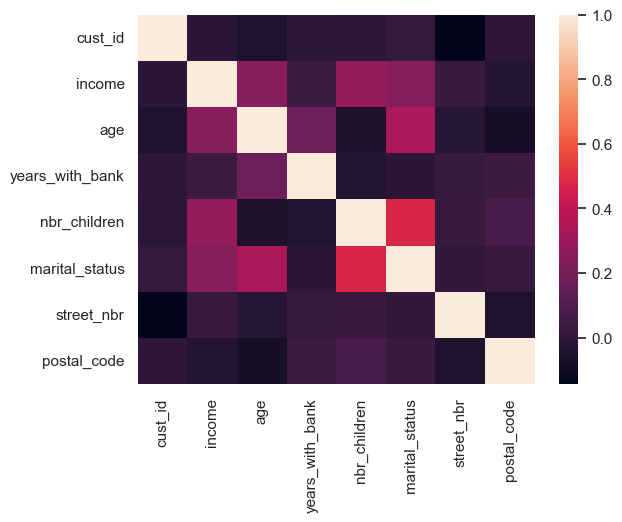

In [119]:
import seaborn as sns
sns.heatmap(customer_df.corr())

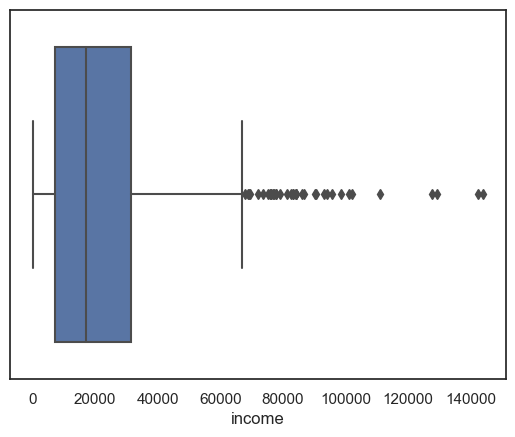

In [120]:
# Outlier Detection
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=customer_df['income'])

plt.show()

In [121]:
from scipy import stats
import numpy as np

#Finding Z Score on Column
stats.zscore(customer_df['income'])

#Turning Absolute
np.abs(stats.zscore(customer_df['income']))

#view the outliers
customer_df['income'][(np.abs(stats.zscore(customer_df['income'])) > 3)]

64     144157
108     90248
153     95585
246    129196
339    101177
419    111004
422    127848
479     90592
484     98566
490    102286
525     93060
595     94123
639    142274
Name: income, dtype: int64

In [122]:
# There are a handful of very high incomes, but nothing that seems unrealistic

In [123]:
# check for missing values
customer_df.isnull().sum()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

In [133]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


<Figure size 640x480 with 0 Axes>

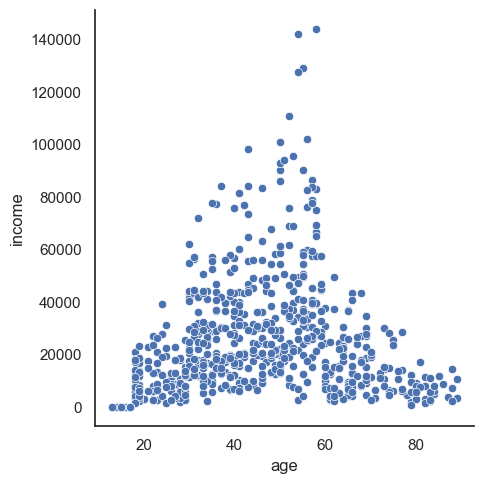

In [124]:
# visualize the data

import seaborn as sns

sns.set_theme()
sns.set_style("white")
sns.despine()

sns.relplot(data=customer_df, kind='scatter',x='age',y='income')

Text(8.319444444444445, 0.5, 'Count of Customers')

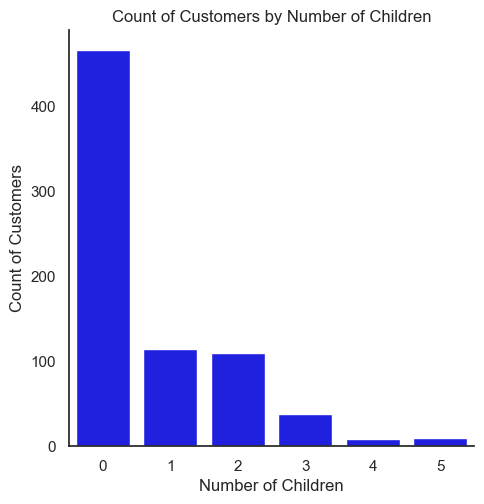

In [132]:
sns.catplot(data=customer_df, x='nbr_children', kind='count', color='blue')

plt.title('Count of Customers by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count of Customers')

Text(8.319444444444445, 0.5, 'Count of Customers')

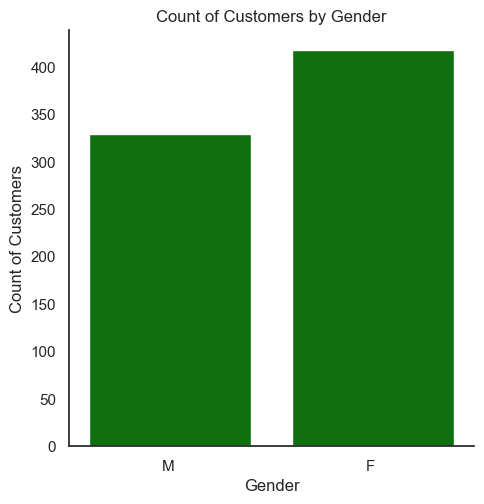

In [134]:
sns.catplot(data=customer_df, x='gender', kind='count', color='green')

plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Customers')

Text(8.319444444444445, 0.5, 'Count of Customers')

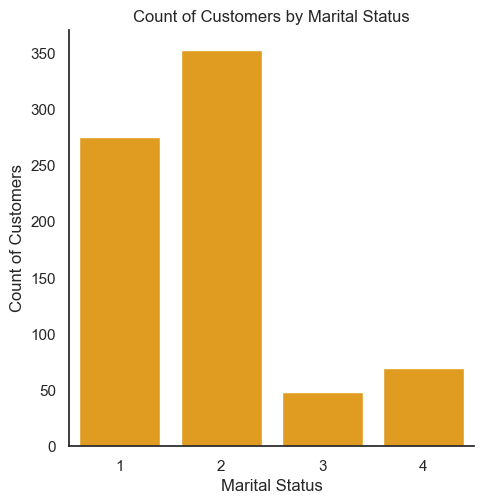

In [137]:
sns.catplot(data=customer_df, x='marital_status', kind='count', color='orange')

plt.title('Count of Customers by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count of Customers')

Text(8.194444444444445, 0.5, 'Count of Customers')

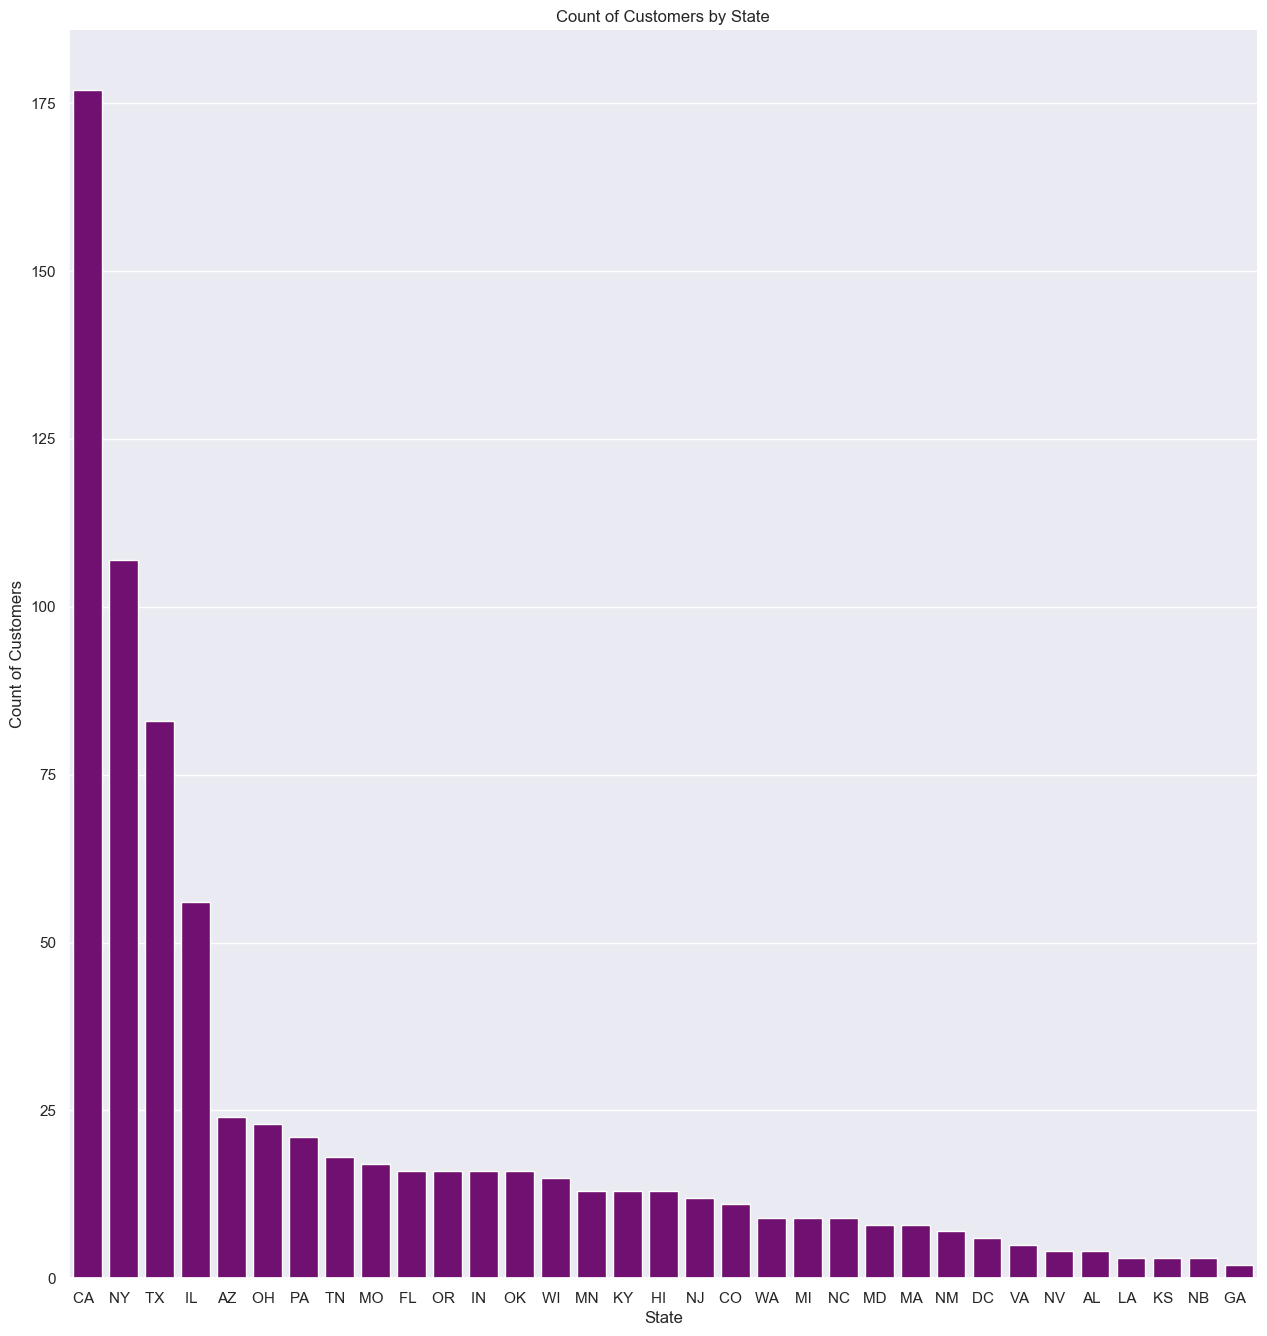

In [162]:
state_df = customer_df.groupby('state_code', as_index=False).count().sort_values(by='cust_id', ascending=False)

g = sns.catplot(data=state_df, x='state_code', y='cust_id', kind='bar', color='purple')
g.fig.set_size_inches(15,15)
plt.title('Count of Customers by State')
plt.xlabel('State')
plt.ylabel('Count of Customers')



#### Step 2 - Data Preparation & Feature Engineering

In [17]:
# there appear to be empty values for name_prefix even though not null

customer_df['name_prefix'][0]

'        '

In [18]:
# strip extra spaces from name_prefix

customer_df['name_prefix'] = customer_df['name_prefix'].str.strip()
sum(customer_df['name_prefix'] == '')

505

In [19]:
# examine counts of each category in name_prefix - 505 missing values

customer_df['name_prefix'].value_counts()

        505
Ms.      92
Mr.      82
Mrs.     31
Dr.      22
Miss     15
Name: name_prefix, dtype: int64

In [20]:
# replace with Miss with Ms.

customer_df = customer_df.replace({"name_prefix" : {'Miss': "Ms."}})

In [21]:
customer_df['name_prefix'].value_counts()

        505
Ms.     107
Mr.      82
Mrs.     31
Dr.      22
Name: name_prefix, dtype: int64

In [22]:
customer_df.groupby(['name_prefix']).agg('marital_status').count()

name_prefix
        505
Dr.      22
Mr.      82
Mrs.     31
Ms.     107
Name: marital_status, dtype: int64

In [23]:
customer_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [24]:
savings_acct_df.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [25]:
# merge_df = pd.merge(customer_df, savings_acct_df[['starting_balance','ending_balance']], on="cust_id", how="left")
savings_merge_df = pd.merge(customer_df, savings_acct_df[['cust_id','starting_balance','ending_balance']], on="cust_id", how="left")
savings_merge_df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,starting_balance,ending_balance
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,NaN
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,651.73,12.89
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,113.04,122.54
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,600.26,609.33
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,250.24,254.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,NaN,NaN
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,169.96,96.25
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,NaN,NaN
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,NaN,NaN


In [26]:
savings_merge_df = savings_merge_df.rename({'starting_balance': 'starting_balance_savings', 'ending_balance': 'ending_balance_savings'}, axis=1)

In [27]:
savings_merge_df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,starting_balance_savings,ending_balance_savings
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,NaN
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,651.73,12.89
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,113.04,122.54
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,600.26,609.33
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,250.24,254.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,NaN,NaN
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,169.96,96.25
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,NaN,NaN
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,NaN,NaN


In [28]:
savings_merge_df['total_savings'] = savings_merge_df['ending_balance_savings'] - savings_merge_df['starting_balance_savings']

In [29]:
savings_merge_df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,starting_balance_savings,ending_balance_savings,total_savings
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,NaN,NaN
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,651.73,12.89,-638.84
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,113.04,122.54,9.50
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,600.26,609.33,9.07
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,250.24,254.02,3.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,NaN,NaN,NaN
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,169.96,96.25,-73.71
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,NaN,NaN,NaN
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,NaN,NaN,NaN


In [30]:
savings_bool = ~savings_merge_df['total_savings'].isnull()

savings_merge_df['has_savings_acount'] = savings_bool

savings_merge_df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,starting_balance_savings,ending_balance_savings,total_savings,has_savings_acount
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,NaN,NaN,False
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,651.73,12.89,-638.84,True
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,113.04,122.54,9.50,True
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,600.26,609.33,9.07,True
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,250.24,254.02,3.78,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,NaN,NaN,NaN,False
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,169.96,96.25,-73.71,True
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,NaN,NaN,NaN,False
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,NaN,NaN,NaN,False


In [31]:
savings_merge_df['total_savings'] = savings_merge_df['total_savings'].fillna(0)

In [32]:
savings_merge_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,starting_balance_savings,ending_balance_savings,total_savings,has_savings_acount
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,NaN,0.00,False
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,651.73,12.89,-638.84,True
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,113.04,122.54,9.50,True
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,600.26,609.33,9.07,True
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,250.24,254.02,3.78,True


In [33]:
# decided to drop cust_id, name_prefix, first_name, last_name, street_nbr, street_name, postal_code, city_name
customer_df.drop(['cust_id', 'name_prefix', 'first_name', 'last_name', 'street_nbr', 'street_name', 'postal_code', 'city_name'], axis=1, inplace=True)

In [34]:
customer_df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,state_code
0,26150,46,5,1,M,2,NV
1,6605,71,1,0,M,2,CA
2,18548,38,8,0,F,1,CA
3,47668,54,3,0,F,1,CA
4,44554,59,9,2,F,4,NY


In [35]:
# Add a region feature that groups states into four regions
# Region Dictionary for States *includes DC

state_region = {
    'WA': 'West',
    'OR': 'West',
    'CA': 'West',
    'AK': 'West',
    'HI': 'West',
    'ID': 'West',
    'MT': 'West',
    'WY': 'West',
    'NV': 'West',
    'UT': 'West',
    'CO': 'West',
    'AZ': 'West',
    'NM': 'West',
    'ND': 'Midwest',
    'SD': 'Midwest',
    'MN': 'Midwest',
    'NE': 'Midwest',
    'KS': 'Midwest',
    'IA': 'Midwest',
    'MO': 'Midwest',
    'WI': 'Midwest',
    'IL': 'Midwest',
    'MI': 'Midwest',
    'IN': 'Midwest',
    'OH': 'Midwest',
    'VT': 'Northeast',
    'ME': 'Northeast',
    'NH': 'Northeast',
    'MA': 'Northeast',
    'NY': 'Northeast',
    'PA': 'Northeast',
    'RI': 'Northeast',
    'CT': 'Northeast',
    'NJ': 'Northeast',
    'DE': 'South',
    'MD': 'South',
    'WV': 'South',
    'DC': 'South',
    'VA': 'South',
    'KY': 'South',
    'NC': 'South',
    'OK': 'South',
    'TX': 'South',
    'AR': 'South',
    'LA': 'South',
    'MS': 'South',
    'AL': 'South',
    'TN': 'South',
    'SC': 'South',
    'GA': 'South',
    'FL': 'South',
}
len(state_region)

51

In [36]:
# check if values in df match dictionary

customer_df['state_code'][0] in state_region

False

In [37]:
customer_df['state_code'][0]

'NV  '

In [38]:
# strip extra spaces

customer_df['state_code'] = customer_df['state_code'].str.strip()

In [39]:
customer_df['state_code'][0]

'NV'

In [40]:
customer_df["region"] = customer_df["state_code"].map(state_region)
customer_df

,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,region
0,26150,46,5,1,M,2,NV,West
1,6605,71,1,0,M,2,CA,West
2,18548,38,8,0,F,1,CA,West
3,47668,54,3,0,F,1,CA,West
4,44554,59,9,2,F,4,NY,Northeast
...,...,...,...,...,...,...,...,...
742,14795,36,6,1,F,4,CA,West
743,26387,56,6,1,M,2,NY,Northeast
744,61300,50,0,2,M,2,NM,West
745,15100,37,7,0,F,2,AL,South


In [41]:
customer_df = customer_df.drop('state_code', axis=1)

In [42]:
# create a senior/not senior boolean

age_bool = customer_df['age'] >= 65

customer_df['is_senior'] = age_bool

# customer_df['senior'] = customer_df.loc[np.where(customer_df['age'] > 65)] = 'True'

In [43]:
customer_df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,region,is_senior
0,26150,46,5,1,M,2,West,False
1,6605,71,1,0,M,2,West,True
2,18548,38,8,0,F,1,West,False
3,47668,54,3,0,F,1,West,False
4,44554,59,9,2,F,4,Northeast,False


In [44]:
# create a children/no children boolean

child_bool = customer_df['nbr_children'] > 0

customer_df['has_children'] = child_bool

In [45]:
customer_df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,region,is_senior,has_children
0,26150,46,5,1,M,2,West,False,True
1,6605,71,1,0,M,2,West,True,False
2,18548,38,8,0,F,1,West,False,False
3,47668,54,3,0,F,1,West,False,False
4,44554,59,9,2,F,4,Northeast,False,True


In [46]:
#Binning with q-cut (bin according to quantiles)
pd.qcut(customer_df['age'], q = 4).value_counts()

(12.999, 28.0]    196
(28.0, 42.0]      187
(56.0, 89.0]      183
(42.0, 56.0]      181
Name: age, dtype: int64

In [47]:
customer_df.loc[customer_df['age']<=28, 'age_group'] = 'under 28'
customer_df.loc[customer_df['age'].between(29,42, inclusive = True), 'age_group'] = '29-42'
customer_df.loc[customer_df['age'].between(43,56, inclusive = True), 'age_group'] = '43-56'
customer_df.loc[customer_df['age']>56, 'age_group'] = 'over 56'

C:\Users\User\AppData\Local\Temp\ipykernel_22556\3587575014.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  customer_df.loc[customer_df['age'].between(29,42, inclusive = True), 'age_group'] = '29-42'
C:\Users\User\AppData\Local\Temp\ipykernel_22556\3587575014.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  customer_df.loc[customer_df['age'].between(43,56, inclusive = True), 'age_group'] = '43-56'


In [48]:
customer_df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,region,is_senior,has_children,age_group
0,26150,46,5,1,M,2,West,False,True,43-56
1,6605,71,1,0,M,2,West,True,False,over 56
2,18548,38,8,0,F,1,West,False,False,29-42
3,47668,54,3,0,F,1,West,False,False,43-56
4,44554,59,9,2,F,4,Northeast,False,True,over 56


In [49]:
customer_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   income           747 non-null    int64 
 1   age              747 non-null    int64 
 2   years_with_bank  747 non-null    int64 
 3   nbr_children     747 non-null    int64 
 4   gender           747 non-null    object
 5   marital_status   747 non-null    int64 
 6   region           744 non-null    object
 7   is_senior        747 non-null    bool  
 8   has_children     747 non-null    bool  
 9   age_group        747 non-null    object
dtypes: bool(2), int64(5), object(3)
memory usage: 48.3+ KB


In [50]:
# transform marital_status into string
customer_df['marital_status'] = customer_df['marital_status'].map(str)

In [51]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   income           747 non-null    int64 
 1   age              747 non-null    int64 
 2   years_with_bank  747 non-null    int64 
 3   nbr_children     747 non-null    int64 
 4   gender           747 non-null    object
 5   marital_status   747 non-null    object
 6   region           744 non-null    object
 7   is_senior        747 non-null    bool  
 8   has_children     747 non-null    bool  
 9   age_group        747 non-null    object
dtypes: bool(2), int64(4), object(4)
memory usage: 48.3+ KB


In [52]:
#  0   income           747 non-null    int64   
#  1   age              747 non-null    int64 
#  2   years_with_bank  747 non-null    int64 
#  3   nbr_children     747 non-null    int64 
#  4   gender           747 non-null    object  # create dummy
#  5   marital_status   747 non-null    object  # create dummy
#  6   state_code       747 non-null    object  # create dummy
#  7   region           744 non-null    object  # create dummy
#  8   is_senior        747 non-null    bool    # map values True = 1, False = 0
#  9   has_children     747 non-null    bool    # map values True = 1, False = 0
#  10  age_group        747 non-null    object  # create dummy

In [53]:
# transform nominal variables into Dummy Variables

cat_feats = customer_df.dtypes[(customer_df.dtypes == 'object')].index.tolist()
df_dummy = pd.get_dummies(customer_df[cat_feats])
df_dummy

,gender_F,gender_M,marital_status_1,marital_status_2,marital_status_3,marital_status_4,region_Midwest,region_Northeast,region_South,region_West,age_group_29-42,age_group_43-56,age_group_over 56,age_group_under 28
0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
1,0,1,0,1,0,0,0,0,0,1,0,0,1,0
2,1,0,1,0,0,0,0,0,0,1,1,0,0,0
3,1,0,1,0,0,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1,0,0,0,0,1,0,0,0,1,1,0,0,0
743,0,1,0,1,0,0,0,1,0,0,0,1,0,0
744,0,1,0,1,0,0,0,0,0,1,0,1,0,0
745,1,0,0,1,0,0,0,0,1,0,1,0,0,0


In [54]:
# Map values onto numbers for is_senior

customer_df.replace({"is_senior" : {True : 1, False : 0}}, inplace=True)

In [55]:
# Map values onto numbers for has_children

customer_df.replace({"has_children" : {True : 1, False : 0}}, inplace=True)

In [56]:
customer_df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,region,is_senior,has_children,age_group
0,26150,46,5,1,M,2,West,0,1,43-56
1,6605,71,1,0,M,2,West,1,0,over 56
2,18548,38,8,0,F,1,West,0,0,29-42
3,47668,54,3,0,F,1,West,0,0,43-56
4,44554,59,9,2,F,4,Northeast,0,1,over 56


In [57]:
# drop the nominal variables from the original dataset

numeric_df = customer_df.drop(cat_feats, axis=1)


In [58]:
numeric_df.head()

,income,age,years_with_bank,nbr_children,is_senior,has_children
0,26150,46,5,1,0,1
1,6605,71,1,0,1,0
2,18548,38,8,0,0,0
3,47668,54,3,0,0,0
4,44554,59,9,2,0,1


In [59]:
# scale the numeric data
#use MinMaxScaler to scale data into a given range ((0,1) by default)

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)
scaled_data

,income,age,years_with_bank,nbr_children,is_senior,has_children
0,0.181399,0.434211,0.555556,0.2,0.0,1.0
1,0.045818,0.763158,0.111111,0.0,1.0,0.0
2,0.128665,0.328947,0.888889,0.0,0.0,0.0
3,0.330667,0.539474,0.333333,0.0,0.0,0.0
4,0.309066,0.605263,1.000000,0.4,0.0,1.0
...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,0.0,1.0
743,0.183043,0.565789,0.666667,0.2,0.0,1.0
744,0.425231,0.486842,0.000000,0.4,0.0,1.0
745,0.104747,0.315789,0.777778,0.0,0.0,0.0


In [60]:
# merge the scaled and dummy variables into one dataset

transformed_df = pd.concat([scaled_data, df_dummy], axis=1)
transformed_df.head()

,income,age,years_with_bank,nbr_children,is_senior,has_children,gender_F,gender_M,marital_status_1,marital_status_2,marital_status_3,marital_status_4,region_Midwest,region_Northeast,region_South,region_West,age_group_29-42,age_group_43-56,age_group_over 56,age_group_under 28
0,0.181399,0.434211,0.555556,0.2,0.0,1.0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
1,0.045818,0.763158,0.111111,0.0,1.0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
2,0.128665,0.328947,0.888889,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,1,1,0,0,0
3,0.330667,0.539474,0.333333,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
4,0.309066,0.605263,1.000000,0.4,0.0,1.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [61]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   income              747 non-null    float64
 1   age                 747 non-null    float64
 2   years_with_bank     747 non-null    float64
 3   nbr_children        747 non-null    float64
 4   is_senior           747 non-null    float64
 5   has_children        747 non-null    float64
 6   gender_F            747 non-null    uint8  
 7   gender_M            747 non-null    uint8  
 8   marital_status_1    747 non-null    uint8  
 9   marital_status_2    747 non-null    uint8  
 10  marital_status_3    747 non-null    uint8  
 11  marital_status_4    747 non-null    uint8  
 12  region_Midwest      747 non-null    uint8  
 13  region_Northeast    747 non-null    uint8  
 14  region_South        747 non-null    uint8  
 15  region_West         747 non-null    uint8  
 16  age_grou

### Accounts Tables

#### Step 1 - EDA

In [62]:
accounts_df.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [63]:
accounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   cust_id           1409 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   account_active    1409 non-null   object 
 4   acct_start_date   1409 non-null   object 
 5   acct_end_date     143 non-null    object 
 6   starting_balance  1409 non-null   float64
 7   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


In [64]:
accounts_df['acct_nbr'].nunique()

1409

In [65]:
checking_acct_df.head()

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18


In [66]:
checking_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           520 non-null    int64  
 1   acct_nbr          520 non-null    int64  
 2   minimum_balance   520 non-null    int64  
 3   per_check_fee     520 non-null    float64
 4   account_active    520 non-null    object 
 5   acct_start_date   520 non-null    object 
 6   acct_end_date     52 non-null     object 
 7   starting_balance  520 non-null    float64
 8   ending_balance    520 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 36.7+ KB


In [67]:
credit_acct_df.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [68]:
credit_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           468 non-null    int64  
 1   acct_nbr          468 non-null    int64  
 2   credit_limit      468 non-null    int64  
 3   credit_rating     468 non-null    int64  
 4   account_active    468 non-null    object 
 5   acct_start_date   468 non-null    object 
 6   acct_end_date     45 non-null     object 
 7   starting_balance  468 non-null    float64
 8   ending_balance    468 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 33.0+ KB


In [69]:
savings_acct_df.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [70]:
savings_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           421 non-null    int64  
 1   acct_nbr          421 non-null    int64  
 2   minimum_balance   421 non-null    int64  
 3   acct_type         421 non-null    object 
 4   account_active    421 non-null    object 
 5   acct_start_date   421 non-null    object 
 6   acct_end_date     46 non-null     object 
 7   starting_balance  421 non-null    float64
 8   ending_balance    421 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 29.7+ KB


<AxesSubplot: xlabel='cust_id', ylabel='Count'>

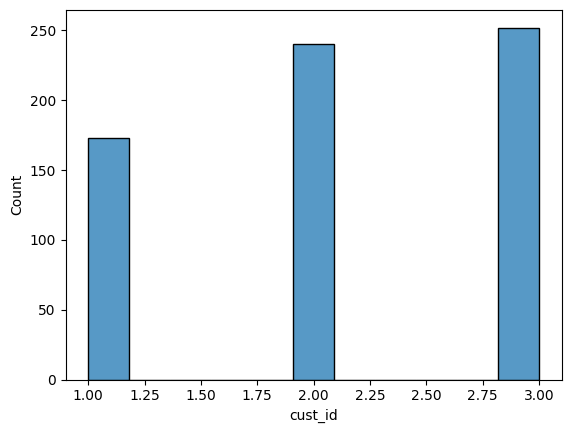

In [71]:
total_accounts = accounts_df.groupby('cust_id').agg('cust_id').value_counts()
sns.histplot(total_accounts)

#### Step 2 - Accounts Table Merge

In [72]:
# Merging of tables on Left join to capture distinct account numbers and pull specific data points into the new merged tables

new_accounts_df = pd.merge(accounts_df, checking_acct_df[['acct_nbr','per_check_fee','minimum_balance']], on=['acct_nbr'], how='left')
new_accounts_df = pd.merge(new_accounts_df, credit_acct_df[['acct_nbr', 'credit_limit', 'credit_rating']], on=['acct_nbr'], how='left')
new_accounts_df = pd.merge(new_accounts_df, savings_acct_df[['acct_nbr', 'minimum_balance']], on=['acct_nbr'], how='left')
new_accounts_df.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,per_check_fee,minimum_balance_x,credit_limit,credit_rating,minimum_balance_y
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,NaN,NaN,500.0
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,NaN,NaN,1000.0,0.0,NaN
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,NaN,NaN,1000.0,0.0,NaN
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,0.0,3000.0,NaN,NaN,NaN
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,NaN,NaN,1300.0,0.0,NaN


In [73]:
# renaming of minimum balance columns to specify which accounts they are from

new_accounts_df[['minimum_balance_CK', 'minimum_balance_SV']] = new_accounts_df[['minimum_balance_x','minimum_balance_y']]
new_accounts_df_clean = new_accounts_df.drop(['minimum_balance_x','minimum_balance_y'], axis=1)
new_accounts_df_clean.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,per_check_fee,credit_limit,credit_rating,minimum_balance_CK,minimum_balance_SV
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,NaN,NaN,500.0
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,NaN,1000.0,0.0,NaN,NaN
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,NaN,1000.0,0.0,NaN,NaN
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,0.0,NaN,NaN,3000.0,NaN
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,NaN,1300.0,0.0,NaN,NaN


In [74]:
# creating dummy accounts for nominal categories (acct_type)

new_accounts_df_clean_dummies = pd.merge(new_accounts_df_clean, pd.get_dummies(new_accounts_df_clean[['acct_nbr', 'acct_type']]), on=['acct_nbr'], how='left')
new_accounts_df_clean_dummies.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,per_check_fee,credit_limit,credit_rating,minimum_balance_CK,minimum_balance_SV,acct_type_CC,acct_type_CK,acct_type_SV
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,NaN,NaN,500.0,0,0,1
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,NaN,1000.0,0.0,NaN,NaN,1,0,0
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,NaN,1000.0,0.0,NaN,NaN,1,0,0
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,0.0,NaN,NaN,3000.0,NaN,0,1,0
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,NaN,1300.0,0.0,NaN,NaN,1,0,0


In [75]:
# adding the account age as a feature on the consolidated dataset

new_accounts_df_clean_dummies['acct_age'] = dt.datetime.now().year - pd.DatetimeIndex(new_accounts_df_clean_dummies['acct_start_date']).year
new_accounts_df_clean_dummies.head()

C:\Users\User\AppData\Local\Temp\ipykernel_22556\2894665407.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new_accounts_df_clean_dummies['acct_age'] = dt.datetime.now().year - pd.DatetimeIndex(new_accounts_df_clean_dummies['acct_start_date']).year


,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,per_check_fee,credit_limit,credit_rating,minimum_balance_CK,minimum_balance_SV,acct_type_CC,acct_type_CK,acct_type_SV,acct_age
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,NaN,NaN,500.0,0,0,1,27
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,NaN,1000.0,0.0,NaN,NaN,1,0,0,29
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,NaN,1000.0,0.0,NaN,NaN,1,0,0,30
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,0.0,NaN,NaN,3000.0,NaN,0,1,0,27
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,NaN,1300.0,0.0,NaN,NaN,1,0,0,28


#### Step 3 - Optional Merge of Customer Details with Accounts Details

In [76]:
# Optional merge of customer records into accounts records

df_customer_accounts = pd.merge(new_accounts_df_clean_dummies, customer_df, on=['cust_id'], how='left')
df_customer_accounts

KeyError: 'cust_id'

### Transactions Tables

In [ ]:
checking_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD


In [ ]:
checking_tran_df['tran_time'] = checking_tran_df['tran_time'].str.strip()
checking_tran_df['tran_time'].isnull().sum()

0

In [ ]:
checking_tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46204 entries, 0 to 46203
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        46204 non-null  int64  
 1   tran_id        46204 non-null  int64  
 2   tran_amt       46204 non-null  float64
 3   principal_amt  46204 non-null  float64
 4   interest_amt   46204 non-null  float64
 5   new_balance    46204 non-null  float64
 6   tran_date      46204 non-null  object 
 7   tran_time      46204 non-null  object 
 8   channel        46204 non-null  object 
 9   tran_code      46204 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 3.5+ MB


In [ ]:
credit_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG


In [ ]:
credit_tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20167 entries, 0 to 20166
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        20167 non-null  int64  
 1   tran_id        20167 non-null  int64  
 2   tran_amt       20167 non-null  float64
 3   principal_amt  20167 non-null  float64
 4   interest_amt   20167 non-null  float64
 5   new_balance    20167 non-null  float64
 6   tran_date      20167 non-null  object 
 7   tran_time      20167 non-null  object 
 8   channel        20167 non-null  object 
 9   tran_code      20167 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ MB


# K-means Clustering - Customer Table

In [79]:
# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

In [80]:
km = KMeans()

In [81]:
# use elbow rule to figure out how many clusters to use

def plot_distortion(transformed_df,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(transformed_df)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

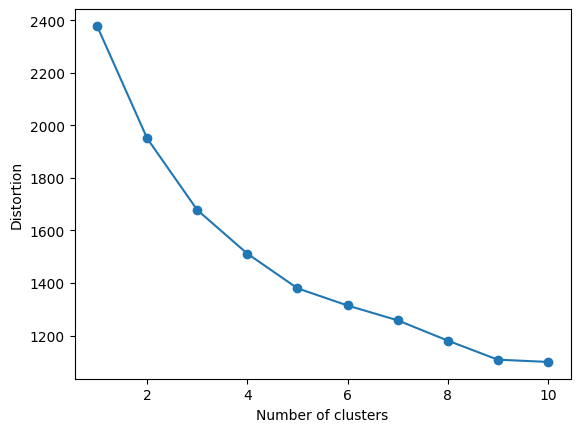

In [82]:
plot_distortion(transformed_df,max_clusters = 10)

In [83]:
km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [84]:
# fit and predict
y_km = km.fit_predict(transformed_df)

In [85]:
y_km

array([3, 2, 4, 4, 1, 1, 0, 2, 1, 3, 4, 0, 3, 4, 1, 0, 3, 0, 2, 0, 1, 2,
       2, 4, 1, 2, 1, 1, 1, 2, 2, 3, 1, 3, 4, 1, 0, 1, 0, 4, 1, 1, 1, 1,
       4, 2, 3, 1, 1, 1, 0, 0, 3, 3, 4, 4, 3, 2, 0, 3, 3, 4, 0, 4, 2, 4,
       4, 1, 4, 4, 4, 1, 2, 2, 2, 1, 1, 1, 4, 0, 1, 1, 4, 4, 2, 1, 2, 1,
       0, 1, 1, 4, 4, 4, 4, 0, 4, 4, 2, 3, 2, 3, 1, 2, 1, 2, 3, 2, 3, 4,
       4, 2, 2, 4, 1, 1, 1, 2, 3, 1, 3, 3, 1, 3, 0, 2, 4, 1, 1, 4, 3, 3,
       4, 1, 2, 4, 2, 1, 0, 0, 2, 2, 1, 3, 3, 4, 2, 2, 2, 1, 4, 2, 1, 3,
       2, 2, 3, 2, 3, 3, 1, 2, 4, 1, 3, 3, 2, 3, 2, 0, 1, 2, 2, 2, 3, 1,
       1, 1, 2, 2, 0, 4, 4, 4, 3, 2, 2, 1, 4, 1, 0, 1, 0, 4, 3, 4, 4, 4,
       1, 3, 2, 1, 0, 4, 2, 1, 3, 1, 1, 2, 0, 4, 2, 0, 4, 3, 0, 3, 2, 1,
       4, 3, 3, 3, 0, 3, 0, 2, 1, 1, 4, 4, 0, 0, 4, 0, 1, 3, 4, 1, 1, 0,
       2, 4, 0, 1, 3, 4, 3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 2, 2, 3, 2, 1, 1,
       4, 4, 2, 4, 3, 1, 1, 4, 4, 0, 3, 1, 0, 3, 2, 3, 4, 2, 2, 3, 1, 0,
       4, 1, 1, 4, 4, 1, 3, 4, 3, 4, 2, 1, 0, 0, 4,

In [86]:
type(y_km)

numpy.ndarray

In [87]:
demographic_clusters = transformed_df

In [88]:
demographic_clusters['clusters'] = y_km.tolist()
demographic_clusters.head()

,income,age,years_with_bank,nbr_children,is_senior,has_children,gender_F,gender_M,marital_status_1,marital_status_2,...,marital_status_4,region_Midwest,region_Northeast,region_South,region_West,age_group_29-42,age_group_43-56,age_group_over 56,age_group_under 28,clusters
0,0.181399,0.434211,0.555556,0.2,0.0,1.0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,3
1,0.045818,0.763158,0.111111,0.0,1.0,0.0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,2
2,0.128665,0.328947,0.888889,0.0,0.0,0.0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,4
3,0.330667,0.539474,0.333333,0.0,0.0,0.0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,4
4,0.309066,0.605263,1.000000,0.4,0.0,1.0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,1


In [89]:
# demographic_clusters = demographic_clusters.drop(['marital_status_1','marital_status_2','marital_status_3','marital_status_4'], axis = 1)

In [90]:
# demographic_clusters = demographic_clusters.drop(demographic_clusters.iloc[:, 6:-1],axis = 1)

# Radar Chart for Customer Segmentation based on demographics

In [91]:
# cluster_0 = demographic_clusters[demographic_clusters['clusters']==0]

In [92]:
demo_0 = demographic_clusters[demographic_clusters['clusters'] == 0].mean().tolist()
demo_1 = demographic_clusters[demographic_clusters['clusters'] == 1].mean().tolist()
demo_2 = demographic_clusters[demographic_clusters['clusters'] == 2].mean().tolist()
demo_3 = demographic_clusters[demographic_clusters['clusters'] == 3].mean().tolist()
demo_4 = demographic_clusters[demographic_clusters['clusters'] == 4].mean().tolist()

In [93]:
import plotly.graph_objects as go

categories = demographic_clusters.columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=demo_0[:-1],
      theta=categories[:-1],
      fill='toself',
      name='Young Men without Children'
))
fig.add_trace(go.Scatterpolar(
      r=demo_4[:-1],
      theta=categories[:-1],
      fill='toself',
      name='Young Women without Children'
))
fig.add_trace(go.Scatterpolar(
      r=demo_3[:-1],
      theta=categories[:-1],
      fill='toself',
      name='Men with Children'
))
fig.add_trace(go.Scatterpolar(
      r=demo_1[:-1],
      theta=categories[:-1],
      fill='toself',
      name='Women with Children'
))
fig.add_trace(go.Scatterpolar(
      r=demo_2[:-1],
      theta=categories[:-1],
      fill='toself',
      name='Seniors'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

Conclusions:

- the bank's customers can be segmented into 5 distinct clusters based on demographics:
    - Cluster 1: Young Men without Children:
        - Relatively new to the bank
        - mostly under 28
        - low income
        - single?
    - Cluster 2: Young Women without Children:
        - Relatively new to the bank
        - mostly under 28
        - low income
        - single?
    - Cluster 3: Men with Children
        - Relatively new to the bank
        - 29-56
        - slightly higher income, still below average
        - married?
    - Cluster 4: Women with Children
        - Relatively new to the bank
        - 29-56
        - slightly higher income, still below average
        - married?
    - Cluster 5: Seniors without Children
        - Women and Men
        - With the bank the longest
        - over 56
        - married?
- in general, the bank has more customers in the west

# PCA Based on Demographic Segmentation

<AxesSubplot: >

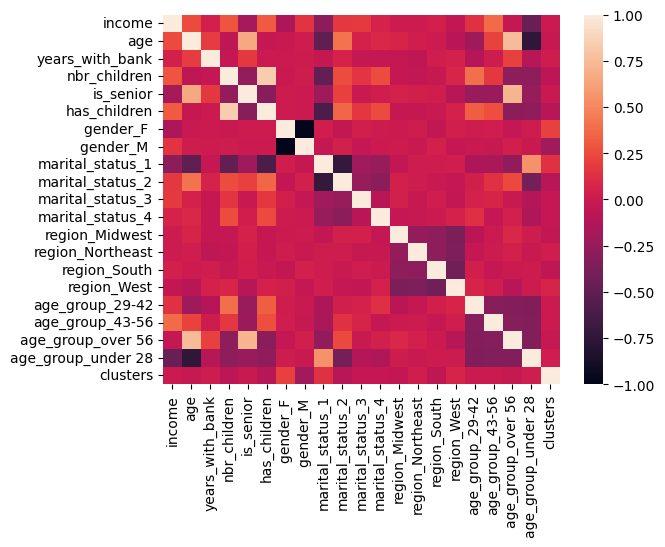

In [ ]:
#Check the Co-relation between features without PCA
sns.heatmap(demographic_clusters.corr()) # if certain features are highly correlated, means we need to apply dimensionality reduction

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA() # create a PCA object
pca.fit(demographic_clusters) # calculate loading scores and the variation each principal component accounts for
pca_data = pca.transform(demographic_clusters) # generate coordinates for a PCA graph based on the loading scores and the scaled data
pca_data = pd.DataFrame(pca_data)
pca_data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.777292,-0.939620,0.566046,-0.915676,0.603518,0.718368,0.343812,-0.030529,0.170731,0.006431,...,-0.025005,-0.010429,-0.094394,-0.130699,-0.124303,-0.061015,-0.012407,-1.328974e-16,8.987317e-17,-1.094560e-16
1,0.172893,-0.530415,1.137605,0.638991,1.029326,-0.231619,0.111221,-0.017093,0.218948,-0.014098,...,0.083898,-0.073283,-0.312401,-0.023835,-0.010266,-0.036519,0.000706,2.346840e-16,1.963790e-16,1.872002e-17
2,-2.120131,0.436601,-0.500485,-0.221781,0.616882,-0.631012,0.027229,0.080134,-0.385018,-0.613192,...,-0.047884,-0.083855,0.053754,-0.040818,-0.044059,0.048709,0.001077,2.905550e-16,-4.468441e-16,-2.272236e-16
3,-2.114630,0.368105,-0.446733,-0.075543,0.624300,0.643119,0.505555,0.181515,-0.521817,-0.439599,...,-0.045978,0.111953,-0.075525,0.105439,-0.033726,0.062875,-0.000902,1.299926e-17,8.051182e-17,-3.293460e-17
4,0.991698,-0.417825,-0.581751,0.579497,-0.163668,-0.156502,-0.397421,0.835625,-0.571560,1.144934,...,-0.414260,0.414327,0.376428,0.064175,0.028949,-0.002418,0.001807,-3.275463e-16,-3.771267e-16,7.403763e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.959598,-0.284995,-1.117493,-0.528844,0.589150,-0.786731,-0.108431,0.096217,-0.615302,0.467501,...,-0.444358,-0.214494,0.150436,-0.108711,-0.207802,-0.014154,-0.004451,1.859318e-16,-9.461160e-16,-2.139265e-16
743,-0.757121,-0.973803,0.722237,-0.613671,-0.379976,0.894924,-0.183660,0.726863,0.203915,0.052910,...,-0.067620,-0.056867,-0.062674,-0.149385,-0.113217,0.061825,-0.010442,-2.439198e-16,3.436201e-17,-1.925035e-17
744,-0.771407,-0.980945,0.539661,-0.992042,0.554612,0.717145,0.296198,-0.016457,0.148996,-0.016878,...,0.032800,0.185060,-0.205156,0.147745,-0.020766,-0.006169,-0.001854,-1.884086e-16,2.286510e-16,1.566328e-18
745,1.001989,-0.295801,-0.639419,0.283606,-0.549834,-0.780220,0.444501,-0.087785,0.313039,-0.693899,...,-0.113089,-0.449020,0.442041,-0.069342,0.030410,0.009167,-0.006322,4.357320e-16,-5.793760e-17,-3.180099e-16


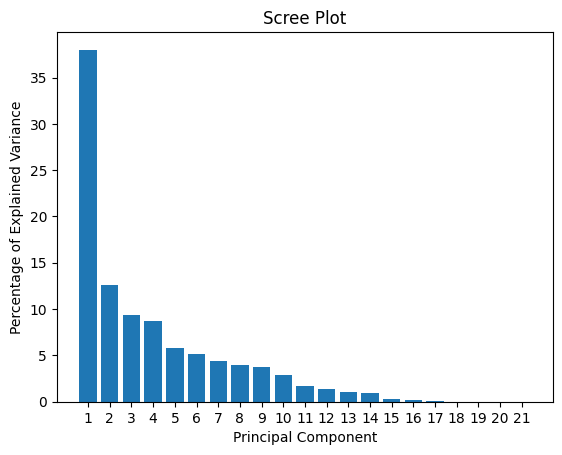

In [ ]:
# draw a scree plot to see how many PC should go into final plot
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1) # calculate the percentage of variation that each PC accounts for.
labels = [str(x) for x in range(1, len(per_var)+1)] # create labels for the scree plot (one label per PC)

# use matplotlib to create a bar plot
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

<AxesSubplot: >

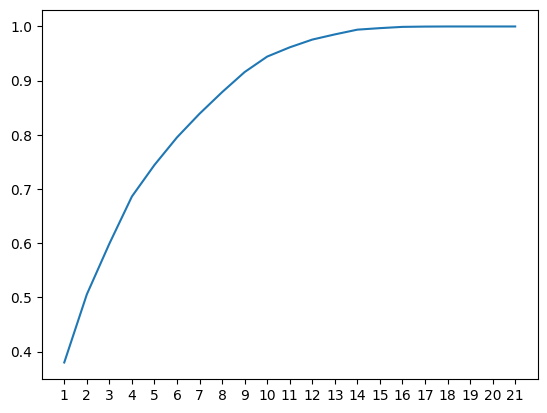

In [ ]:
# Cumulative explained ratio plot
sns.lineplot(x=labels, y=np.cumsum(pca.explained_variance_ratio_))

In [ ]:
pca_data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.777292,-0.939620,0.566046,-0.915676,0.603518,0.718368,0.343812,-0.030529,0.170731,0.006431,...,-0.025005,-0.010429,-0.094394,-0.130699,-0.124303,-0.061015,-0.012407,-1.328974e-16,8.987317e-17,-1.094560e-16
1,0.172893,-0.530415,1.137605,0.638991,1.029326,-0.231619,0.111221,-0.017093,0.218948,-0.014098,...,0.083898,-0.073283,-0.312401,-0.023835,-0.010266,-0.036519,0.000706,2.346840e-16,1.963790e-16,1.872002e-17
2,-2.120131,0.436601,-0.500485,-0.221781,0.616882,-0.631012,0.027229,0.080134,-0.385018,-0.613192,...,-0.047884,-0.083855,0.053754,-0.040818,-0.044059,0.048709,0.001077,2.905550e-16,-4.468441e-16,-2.272236e-16
3,-2.114630,0.368105,-0.446733,-0.075543,0.624300,0.643119,0.505555,0.181515,-0.521817,-0.439599,...,-0.045978,0.111953,-0.075525,0.105439,-0.033726,0.062875,-0.000902,1.299926e-17,8.051182e-17,-3.293460e-17
4,0.991698,-0.417825,-0.581751,0.579497,-0.163668,-0.156502,-0.397421,0.835625,-0.571560,1.144934,...,-0.414260,0.414327,0.376428,0.064175,0.028949,-0.002418,0.001807,-3.275463e-16,-3.771267e-16,7.403763e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.959598,-0.284995,-1.117493,-0.528844,0.589150,-0.786731,-0.108431,0.096217,-0.615302,0.467501,...,-0.444358,-0.214494,0.150436,-0.108711,-0.207802,-0.014154,-0.004451,1.859318e-16,-9.461160e-16,-2.139265e-16
743,-0.757121,-0.973803,0.722237,-0.613671,-0.379976,0.894924,-0.183660,0.726863,0.203915,0.052910,...,-0.067620,-0.056867,-0.062674,-0.149385,-0.113217,0.061825,-0.010442,-2.439198e-16,3.436201e-17,-1.925035e-17
744,-0.771407,-0.980945,0.539661,-0.992042,0.554612,0.717145,0.296198,-0.016457,0.148996,-0.016878,...,0.032800,0.185060,-0.205156,0.147745,-0.020766,-0.006169,-0.001854,-1.884086e-16,2.286510e-16,1.566328e-18
745,1.001989,-0.295801,-0.639419,0.283606,-0.549834,-0.780220,0.444501,-0.087785,0.313039,-0.693899,...,-0.113089,-0.449020,0.442041,-0.069342,0.030410,0.009167,-0.006322,4.357320e-16,-5.793760e-17,-3.180099e-16


Text(0, 0.5, 'PC2 - 12.6%')

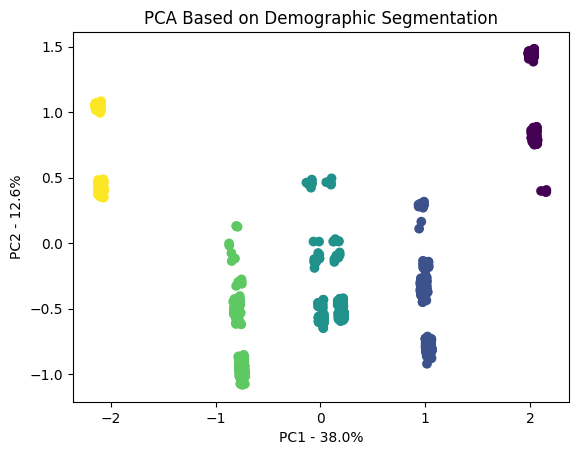

In [ ]:
# draw a PCA plot
pca_df = pd.DataFrame(pca_data)

plt.scatter(pca_df[0], pca_df[1], c=demographic_clusters['clusters'])
plt.title('PCA Based on Demographic Segmentation')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

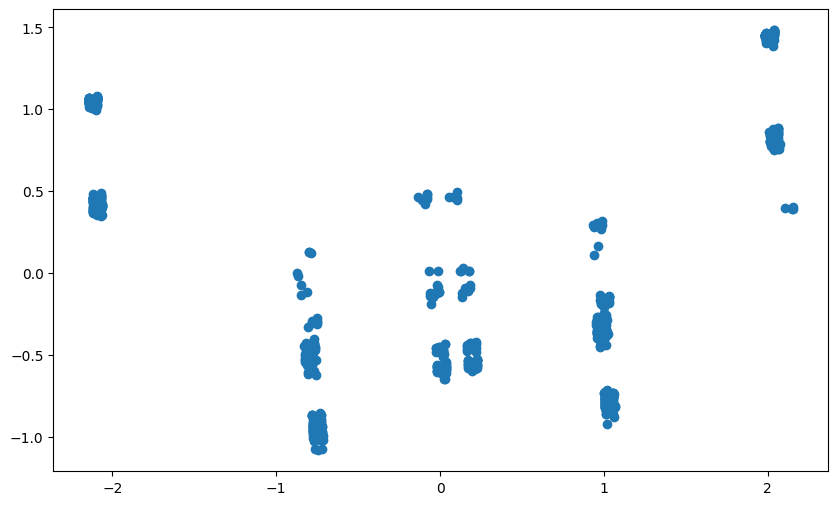

In [ ]:
x = pca_df[0]
y = pca_df[1]

# create the figure and axes, set the figure size
fig, ax = plt.subplots(figsize = (10,6))

# scatter plot
ax.scatter(x,y)
plt.show()

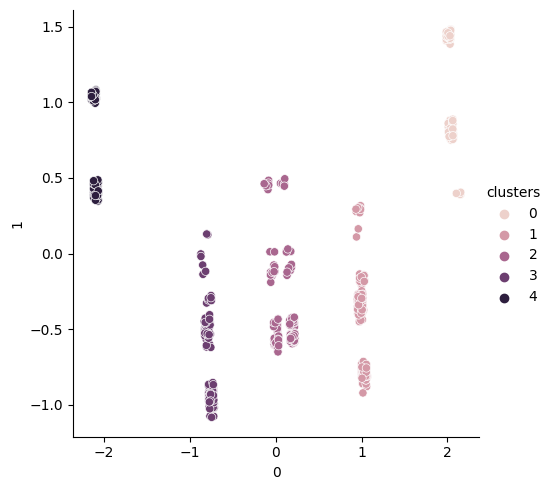

In [ ]:
# Create a visualization
sns.relplot(
    data=pca_df,
    x=pca_df[0],
    y=pca_df[1],
    hue=demographic_clusters['clusters']
)